# Exercise Set 12: Peer effects 


In this Exercise Set 12 we will investigate peer effects data. 

## 12.1: roommate peer effects


<br>
<br>

We use a simlated dataset which will give results that provide conclusions similar to Sacerdote (2000). 

### Data structuring 

Our data set does not contain a network but has an implicit one associated. We assume there is an edge between all room mates. 

> **Ex. 12.1.1:** Create a column called `person_other` with identity of the other person in room.
>> *Hint:* You can get the unique people in the room by using `df.groupby('room').person.unique()`.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv("peer_effects_room.csv")

In [3]:
df1 = df.merge(df[["room","person"]],on="room",suffixes=("","_other"))
df1 = df1[df1["person"]!= df1["person_other"]]
df1

,person,room,high_school_GPA,college_GPA,person_other
1,0,351,-1.715472,-1.285307,1645
2,1645,351,-0.818594,-0.434847,0
5,1,738,-0.530190,-0.031833,1039
6,1039,738,-0.493444,0.299729,1
9,2,247,-0.589543,-0.203230,944
...,...,...,...,...,...
3990,1951,54,2.111587,-0.610765,1860
3993,1884,178,-1.261528,-2.280256,1916
3994,1916,178,-1.706630,-3.209575,1884
3997,1922,730,1.642223,4.076931,1946


<br>

> **Ex. 12.1.2:** Add information on the roommate GPA in high school and college.
>> *Hint:* This can be done merging on `person_other`.

In [4]:
df2 = df1.merge(df,left_on="person_other",right_on="person",suffixes=("","_other"))
df2 = df2.loc[:,~df2.columns.duplicated()] # remove duplicate column

In [5]:
df2

,person,room,high_school_GPA,college_GPA,person_other,room_other,high_school_GPA_other,college_GPA_other
0,0,351,-1.715472,-1.285307,1645,351,-0.818594,-0.434847
1,1645,351,-0.818594,-0.434847,0,351,-1.715472,-1.285307
2,1,738,-0.530190,-0.031833,1039,738,-0.493444,0.299729
3,1039,738,-0.493444,0.299729,1,738,-0.530190,-0.031833
4,2,247,-0.589543,-0.203230,944,247,1.281112,-0.479543
...,...,...,...,...,...,...,...,...
1995,1951,54,2.111587,-0.610765,1860,54,1.993014,1.870441
1996,1884,178,-1.261528,-2.280256,1916,178,-1.706630,-3.209575
1997,1916,178,-1.706630,-3.209575,1884,178,-1.261528,-2.280256
1998,1922,730,1.642223,4.076931,1946,730,-0.121075,0.114143


<br>
<br>

### Data exploration and randomization

We now have our final dataset and can begin investigating how the raw data looks. 

> **Ex. 12.1.3:** plot own GPA in high school vs college in a scatter plot.

Text(0.5, 0, 'High School GPA')

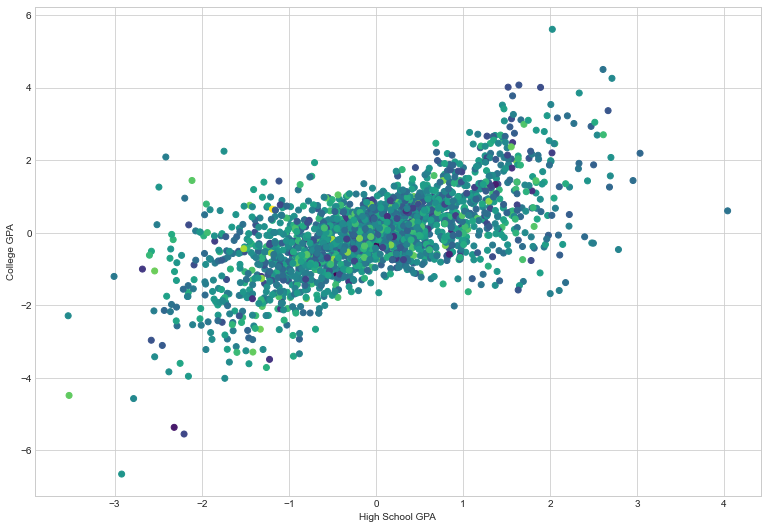

In [18]:
fig = plt.figure(figsize=(13,9))
ax = fig.add_subplot(1,1,1)
ax.scatter(df2["high_school_GPA"],df2["college_GPA"],cmap='viridis',c=df["high_school_GPA"])
ax.set_ylabel("College GPA")
ax.set_xlabel("High School GPA")

<br>
We want to check there is random assignment of roommates. 

> **Ex. 12.1.4:** Plot high school GPA vs roommate's high school GPA. Comment on the output. Run a regresion of high school GPA on roommate's high school GPA to formally check random assignment.
>
>> *Hint*: To run regressions in python, you can use the `statsmodels` package. Look up it's documentation and use the `.formula` api to estimate your model. To see a summary of a fitted model you can call `.summary()` on the object. 
>
>> *Hint:* Under random assignment we would expect there to be no relation between the high school GPA's of roommates. Why is this? 

Text(0.5, 0, 'Roommates high School GPA')

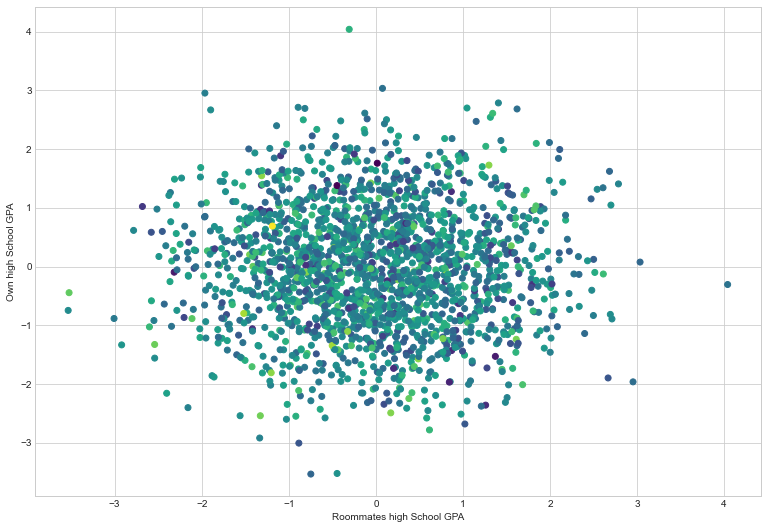

In [24]:
fig = plt.figure(figsize=(13,9))
ax = fig.add_subplot(1,1,1)
ax.scatter(df2["high_school_GPA"],df2["high_school_GPA_other"],cmap='viridis',c=df["high_school_GPA"])
ax.set_ylabel("Own high School GPA")
ax.set_xlabel("Roommates high School GPA")

Visually there seems to be no correlation between roommates high school GPA's. Therefore, there might be random assignment conditional on GPA i.e. roommates are not selected by their similarity in GPA scores from high school. However, Assignment is likely influenced by gender (boys living with boys - vice versa). Random assignment is essential for the identification as this removes selection bias / correlated effects.

In [23]:
#regression 
model = ols("high_school_GPA ~ high_school_GPA_other",data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        high_school_GPA   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07263
Date:                Wed, 20 May 2020   Prob (F-statistic):              0.788
Time:                        12:23:23   Log-Likelihood:                -2883.6
No. Observations:                2000   AIC:                             5771.
Df Residuals:                    1998   BIC:                             5782.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0284      0.023     -1.241      0.215      -0.073       0.016
high_school_GPA_other    -0.0060      0.022     -0.269      0.788      -0.050       0.038
==============================================================================
Omnibus:                        0.231   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.891   Jarque-Bera (JB):                0.288
Skew:                           0.015   Prob(JB):                        0.866
Kurtosis:                       2.949   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The estimate from the regression is $-0.0060$ with a p-value of $0.788$ which is highly insignificant. Therefore, the null of relation between roommates and GPA can be rejected. Thus, there are no relation between your own GPA and the roommate you will be assigned to at college. 

<br>
<br>

## Roommate effect

Having checked the data we move on to analyzing peer effects. We begin with analyzing **exogenous** peer effects. I.e. peer effects that are related to the ex ante characteristics of the roommate.

> **Ex. 12.1.5:** Plot own GPA in college vs. roommate GPA in high school. Comment on the output. Test whether there is an impact using a regresion of college school GPA on high school GPA for the person itself and its roommate.

Text(0.5, 0, 'Roommates high School GPA')

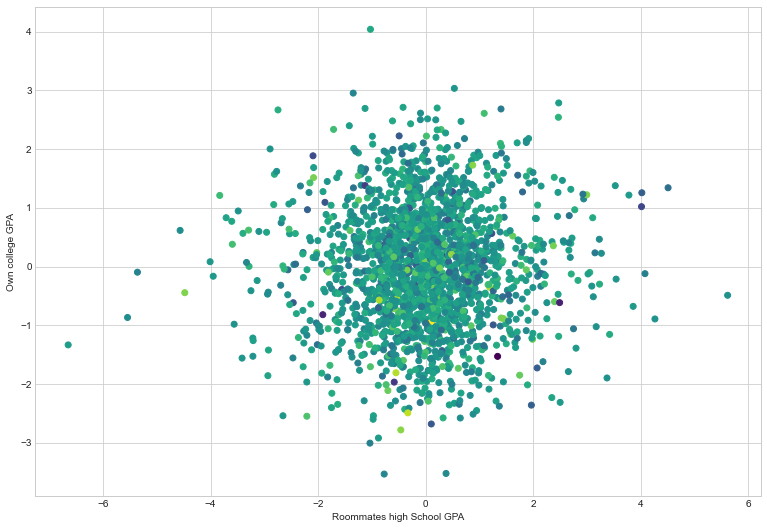

In [29]:
fig = plt.figure(figsize=(13,9))
ax = fig.add_subplot(1,1,1)
ax.scatter(df2["college_GPA"],df2["high_school_GPA_other"],cmap='viridis',c=df["college_GPA"])
ax.set_ylabel("Own college GPA")
ax.set_xlabel("Roommates high School GPA")

Visually there seems to be no clear connection between your roommates exogenous characteristics and your own college GPA. 

In [27]:
#regression 
model2 = ols("college_GPA ~ high_school_GPA_other + high_school_GPA" ,data=df2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            college_GPA   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     671.3
Date:                Wed, 20 May 2020   Prob (F-statistic):          1.03e-223
Time:                        14:45:36   Log-Likelihood:                -2586.0
No. Observations:                2000   AIC:                             5178.
Df Residuals:                    1997   BIC:                             5195.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0226      0.020     -1.147      0.252      -0.061       0.016
high_school_GPA_other     0.0356      0.019      1.847      0.065      -0.002       0.073
high_school_GPA           0.7059      0.019     36.606      0.000       0.668       0.744
==============================================================================
Omnibus:                       77.587   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.025
Skew:                          -0.117   Prob(JB):                     5.52e-47
Kurtosis:                       4.582   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We now move on to analyze **endogenous** peer effects.

> **Ex. 12.1.6:** Test whether there is an association between own college GPA and roommates. Do this by running a regresion of college school GPA on high school GPA for the person itself and its roommate. Comment on the output.

<br>
<br>

# 12.2 Peer effects in Danish classrooms

Read the [report by Kraka on peer effects in Danish schools](http://kraka.dk/sites/default/files/public/baggrundsnotat_klassekammerateffekter_0.pdf) from 2019. If you do not speak Danish talk to your group about the content.
> **Ex. 12.2.1:** Explain the identification strategy in words.

**Answer**

The report tries to estimate short- and longterm peer effects in Danish schools. The short term model deals with the outcome of final school grades where the following factors affect the outcome: 

* Observed socioeconomic background, eg. parents income, parents education, citizenship etc.  for peer i in school s at time t. 

* Observed peers socioeconomic background estimated through a leave-one-out means. This is the exogenous effect.

The long term model uses the same factors but is a model with outcomes for peers level of education, labor status and income 20 years from graduation. 


The two main problems for identification deals with the unobserved selection into schools and classes i.e. the correlated effects: 

1) Parents may know the average peer composition on a given school which may affect the choice of school. 

2) Peers are not randomly assigned to classes because of parent-selection, self-selection or other selection mechanisms such as grades, gender etc. 


The identification strategy in the report addresses these two problems in a quasi-experimental setting:   

1) year-to-year variation in the peer composition in a given school. The critical assumption is that parents do not know the year-to-year variation albeit they may know the average composition. Should the assumption be true the parent-selection of school vanishes and variation is then random.

2) Analyze school cohorts instead of classes. This removes the class selection problem as these are random

> **Ex. 12.2.2:** Are there any shortcomings of the identification strategy? What does the seminal paper [Hoxby (2000)](https://www.nber.org/papers/w78612.pdf) test for?

**Answer**

Although the KRAKA report and Hoxby's paper are similar in methodology there are some apparent shortcomings in the report. For instance: 

* Hoxby deals a lot with the possibility of the random year-to-year peer composition being attributed solely to time trends. Therefore, Hoxby eliminates linear time trends and schools that exhibit non-linear patterns from the sample. It is crucial for identification that the variation is indeed random and not attributed to a time trend. However, the report does not investigate this. 

* The report uses an average share of non-western immigrants. However, if a school exhibit a trend in non-western immigrants this could be associated with trends in other unobserved endogenous variables that could influence i.e the long term level of income. Thus, making it hard to disentangle correlated and endogenous peer effects. Hoxby runs a 2SLS regression where the estimated residuals are used as an instrument for the actual variation in racial peer composition. 

* The findings of the report does not account for common shocks with long-lasting effects. As Hoxby argues a common shock could be the peer effect associated with a higher teaching level that has a long-lasting effect (2+ years). Hence, the inclusion of time trends and fixed effects won't be able to capture these fluctuations.

> **Ex. 12.2.3:** Try to come up with identification strategies for identifying peer effects in the context of Danish class rooms.

**Answer**

A different identification strategy for identifying peer effects could be through endogeneity of friendship networks as in Goldsmith-Pinkham, Imbens (2013). In this paper, the authors examine how homophile individuals form links and how this correlates with GPA outcomes.